# **Kaggle Dataset Code**

In [ ]:
- DDL pro Impalu nebo Hive
- DDL pro tabulky CSV 1:1 - HDFS cesta - simulování vrstev - kouknout se na LinFaDu a GaFadu

[**Dataset link**](https://www.kaggle.com/datasets/arshkon/linkedin-job-postings/)

# Airflow

## Installing Airflow

In [472]:
!pip install apache-airflow

     |████████████████████████████████| 61kB 6.7MB/s 
     |████████████████████████████████| 81kB 12.8MB/s 
     |████████████████████████████████| 122kB 23.3MB/s 
     |████████████████████████████████| 133kB 23.3MB/s 
     |████████████████████████████████| 81kB 11.2MB/s 
     |████████████████████████████████| 51kB 13.9MB/s 
  Created wheel for tzlocal: filename=tzlocal-1.5.1-cp37-none-any.whl size=17545 sha256=83067c3f158093a11e248bb497067b60499eface49c34e1ffc3d7724ad76186b
  Stored in directory: /home/jakub.cajzl/.cache/pip/wheels/15/ae/df/a67bf1ed84e9bf230187d36d8dcfd30072bea0236cb059ed91
Successfully built tzlocal
ERROR: flask 1.1.1 has requirement Werkzeug>=0.15, but you'll have werkzeug 0.14.1 which is incompatible.
  Found existing installation: python-daemon 2.2.4
    Uninstalling python-daemon-2.2.4:
ERROR: Could not install packages due to an EnvironmentError: [Errno 30] Read-only file system: 'daemon.py'



In [474]:
!pip install --upgrade Werkzeug

     |████████████████████████████████| 235kB 6.1MB/s 
  Created wheel for MarkupSafe: filename=MarkupSafe-2.1.5-cp37-none-any.whl size=9890 sha256=8f667d00912fa5430176dd67f1525cf20b875c34b0c0904c6fc5a3a67e1d14af
  Stored in directory: /home/jakub.cajzl/.cache/pip/wheels/bd/d4/28/f67d8848991ef01185aec9d27a5bf346a74e39f5b8ac3ccbdb
Successfully built MarkupSafe
ERROR: flask-appbuilder 2.2.1 has requirement marshmallow<2.20,>=2.18.0, but you'll have marshmallow 3.8.0 which is incompatible.
ERROR: apache-airflow 1.10.10 has requirement cattrs~=0.9, but you'll have cattrs 1.0.0 which is incompatible.
ERROR: apache-airflow 1.10.10 has requirement colorlog==4.0.2, but you'll have colorlog 4.2.1 which is incompatible.
ERROR: apache-airflow 1.10.10 has requirement configparser<3.6.0,>=3.5.0, but you'll have configparser 5.0.0 which is incompatible.
ERROR: apache-airflow 1.10.10 has requirement flask-caching<1.4.0,>=1.3.3, but you'll have flask-caching 1.9.0 which is incompatible.
ERROR: apache-

In [480]:
import airflow

ModuleNotFoundError: No module named 'werkzeug.wrappers.json'; 'werkzeug.wrappers' is not a package

## Setting up Airflow

In [ ]:
# Initialize the Airflow database
airflow db init

# Start the Airflow web server
airflow webserver --port 8080

# Start the Airflow scheduler
airflow scheduler

## Testing Airflow

In [ ]:
# Example .py script:

from pyspark.sql import SparkSession

def main():
    spark = SparkSession.builder \
        .appName("Example PySpark Job") \
        .getOrCreate()

    data = [("Alice", 34), ("Bob", 45), ("Cathy", 29)]
    df = spark.createDataFrame(data, ["Name", "Age"])

    df.show()

    spark.stop()

if __name__ == "__main__":
    main()

### Creating an Airflow DAG

In [ ]:
from airflow import DAG
from airflow.operators.bash_operator import BashOperator
from datetime import datetime, timedelta

# Define default arguments
default_args = {
    'owner': 'airflow',
    'depends_on_past': False,
    'start_date': datetime(2023, 1, 1),
    'email_on_failure': False,
    'email_on_retry': False,
    'retries': 1,
    'retry_delay': timedelta(minutes=5),
    }

# Define the DAG
dag = DAG(
    'pyspark_job',
    default_args=default_args,
    description='A simple DAG to run a PySpark job',
    schedule_interval=timedelta(days=1),
    )

# Define the BashOperator to run the PySpark script
run_pyspark_job = BashOperator(
    task_id='run_pyspark_job',
    bash_command='spark-submit /path/to/pyspark_job.py',
    dag=dag,
    )

# Set the task in the DAG
run_pyspark_job

# Setting up environment

## Python version

In [527]:
sys.version

'3.7.3 | packaged by conda-forge | (default, Jul  1 2019, 21:52:21) \n[GCC 7.3.0]'

## Kerberos login

In [492]:
# Closing all active Kerberos connections (tickets):
# !kdestroy

# Starting a Kerberos connection:
!kinit -kt Jakub.Cajzl.keytab Jakub.Cajzl

# Displaying active tickets:
!klist

Ticket cache: FILE:/tmp/krb5cc_1512864696
Default principal: Jakub.Cajzl@ADASTRA.CZ

Valid starting       Expires              Service principal
06/26/2024 11:10:42  06/27/2024 11:10:42  krbtgt/ADASTRA.CZ@ADASTRA.CZ


## Hadoop server and Spark home

In [481]:
!echo $SPARK_HOME

/opt/cloudera/parcels/SPARK3/lib/spark3


In [482]:
!echo $HADOOP_CONF_DIR 

/etc/hive/conf


## Libraries

In [493]:
# ========================================================== #
# Importing Python libraries:
# ========================================================== #

# Main libraries:
import sys, os, subprocess
from datetime import datetime, date

# Logging:
import logging
from logging.handlers import QueueHandler, QueueListener
from queue import Queue
import yaml
from yaml import load

try:
    from yaml import CLoader as Loader
except ImportError:
    from yaml import Loader

# Main libraries:
import pandas as pd
import numpy as np

# Statistics libraries:
import scipy as stats

# Plotting libraries:
import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

# ========================================================== #
# Importing PySpark libraries:
# ========================================================== #

import pyspark
from pyspark import SparkConf, SparkContext, StorageLevel
from pyspark.sql import SparkSession, DataFrame, SQLContext

# from pyspark.sql import types as T, functions as F

from pyspark.sql.functions import col
from pyspark.sql.types import *

# It is better to load pySpark version of Pandas as 'ps' instead of 'pd'
# because pySpark has differences in their version of Pandas 
# (mainly because pySpark is masivelly parallelized and has many 
# parallelization parameters).
# from pyspark import pandas as ps

In [494]:
# Setting-up the display options for Pandas dataframes to display 100 columns and rows (not truncated):
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [614]:
# ======================================================================== #

# Importing configuration settings from a YAML file:
if __name__ == '__main__':
    
    configuration_file = "configuration.yaml"
    
    with open(configuration_file, 'r', encoding='utf-8') as stream:
        configuration = yaml.load(stream, Loader)
        
        
# Function to print YAML (nested dictionary):
def print_configuration(dictionary, indent=0):    
    for key, value in dictionary.items():
        
        # Printing a key:
        print('  ' * indent + str(key) + ':', end=' ')
        
        # Printing a value:
        if isinstance(value, dict):
            print()
            print_configuration(value, indent+1)
        else:
            print(value)

            
# Displaying the configuration (printing out the nested YAML data):
print("Current configuration:\n")
print_configuration(configuration)

Current configuration:

logger: 
  file: log_file.log
  encoding: utf-8
  level: logging.INFO
  format: %(asctime)s | %(levelname)s | line: %(lineno)d | %(funcName)s: %(message)s
files: 
  jobs: hdfs_files/kaggle_dataset/job_postings.csv
  companies: hdfs_files/kaggle_dataset/companies.csv
  industries: hdfs_files/kaggle_dataset/company_industries.csv
  salaries: hdfs_files/kaggle_dataset/salaries.csv
  employee_counts: hdfs_files/kaggle_dataset/employee_counts.csv
  job_skills: hdfs_files/kaggle_dataset/job_skills.csv
  skills_map: hdfs_files/kaggle_dataset/skills.csv
delimiter_import: ,
delimiter_export: `
dataframes_to_check: 
  df_jobs: job_id
  df_companies: company_id
  df_salaries: job_id
  df_industries: company_id
  df_employee_counts: company_id
  df_skills: job_id


## Logger

In [510]:
# Displaying all current handlers of logging (should be none):
logger = logging.getLogger()  # Initializing a logger
logger.handlers[:]

[<StreamHandler stderr (NOTSET)>,
 <StreamHandler stdout (DEBUG)>,
 <StreamHandler stdout (INFO)>,
 <StreamHandler stdout (DEBUG)>]

In [603]:
# Removing all old handlers:
for handler in logger.handlers[:]:
    logger.removeHandler(handler)

In [597]:
# Displaying all current handlers of logging (should be none):
logger.handlers[:]

[]

In [611]:
# Setting-up and starting a logger:

# Starting a logger:
logger = logging.getLogger(__name__)


# Setting-up a logger:

# IMPORTANT INFO:
# "logging.basicConfig" does *nothing* if a handler has been set up already. The only option is to set the keyword argument "force" to "True"

try:
    logging.basicConfig(
        # force = True,  # From Python 3.8 (I have 3.7.3.). If this keyword argument is specified as true, any existing handlers attached to the root logger are removed and closed, before carrying out the configuration as specified by the other arguments.
        filename = configuration['logger']['file'],  # Using a FileHandler rather than a StreamHandler
        # stream = sys.stdout,  # Using a StreamHandler rather than a FileHandler. IMPORTANT: This argument is incompatible with *filename* - if both are present, a ValueError is raised.
        encoding = configuration['logger']['encoding'],
        level = logging.INFO,
        format = configuration['logger']['format'],
        )
    print("Logger configuration succesfully loaded.")
    logger.info(f'Logger configuration succesfully loaded from a file "{logger_filename}"')
except Exception as error:
    logger.error(f'Error: {error}')
    logger.warning(f'Logger configuration was not loaded from a file "{logger_filename}"')

    
# Setting a logger level:
#logger.setLevel(logging.INFO)
    
# Adding a logger handler:
#logger.addHandler(handler)

Logger configuration succesfully loaded.


In [ ]:
# Other version of logging configuration:

# Logging configuration:
#formatter = logging.Formatter('[%(asctime)s] %(levelname)s @ line %(lineno)d: %(message)s')
#handler = logging.StreamHandler(sys.stdout)
#handler.setLevel(logging.INFO)
#handler.setFormatter(formatter)
#logger = logging.getLogger()
#logger.setLevel(logging.INFO)
#logger.addHandler(handler)

In [488]:
# Defining a function for clearing Log file (i.e. deleting rows > 'max_rows'):
def clear_log(file_path, max_rows):
    """
    The function clears log file, i.e. deletes rows > 'max_rows'.
    
    Parameters:
    - file_path (string): path of the log file
    - max_rows (str): maximum number of rows that the log file should have
    """
    
    # Read the content of the file:
    with open(file_path, 'r', encoding='utf8') as file:
        lines = file.readlines()
    
    # If the log file has more lines than specified 'max_rows', then delete one or more runs:
    while len(lines) > max_rows:
        # If the occurence of the 'New run of the program' is in the log, delete this run:
        for index, line in enumerate(lines[1:]): # Excluding a first row from search, because I want the log to start with a "New run of the program" line.
            if "New run of the program" in line:
                lines = lines[(index+1):]
                break

    with open(file_path, 'w') as file:
        file.writelines(lines)

In [489]:
# Calling the function to delete log file lines (more than 1000):
max_log_lines = 1000
clear_log(configuration['logger']['file'], max_log_lines)

In [612]:
# "New run" logger info message:
logger.info('\n\n============= New run of the program =============\n')

# Examples of different logger levels:
# INFO: logger.info('Info')
# DEBUG: logger.debug('Debugging info')
# WARNING: logger.warning('Warning')
# ERROR: logger.error('Error')

# ======================================================================== #

## Spark session

In [15]:
# Starting a Spark session:
spark = (SparkSession
     .builder
     .master("local")
     .appName("app_01")
     .getOrCreate()
     )

In [16]:
# Listing a main (local) directory:
!ls

created_dataset_csv	 industries.csv      PySpark_Kaggle_Dataset.ipynb
created_dataset_parquet  Jakub.Cajzl.keytab  Spark_Excercises.ipynb
final_dataset.csv	 kaggle_dataset


In [10]:
# Removing a parquet dataset file:
# !rm -r created_dataset.parquet

# Main Code

In [15]:
### FUNCTIONS ###

# =================================================================================================================== #
def get_dataframe_name(dataframe_file: pyspark.sql.DataFrame) -> str:
    """
    The function returns a name of the DataFrame variable as a string.
    
    Parameters: 
    - dataframe (pd.DataFrame): DataFrame variable
    
    Returns: 
    - str: name of the DataFrame variable as a string
    """
    
    for obj_name, obj in globals().items():
        if obj is dataframe_file and isinstance(obj, pyspark.sql.DataFrame):
            return obj_name
# =================================================================================================================== #


# =================================================================================================================== #
def csv_load(file: str, delimiter: str) -> pd.DataFrame:
    """
    The function loads the files in the CSV format (with specified delimiter) into Pandas dataframe.
    
    Parameters:
    - file (string): the whole path of the CSV file (including a file name with file extension), e.g.: '../dataset/job_postings.csv'
    - delimiter (str): the delimiter used in the CSV, e.g.: comma, semicolon, etc.
    
    Return:
    - pd.Dataframe: the dataframe that holds the data from the CSV file
    """
    
    try:
        print(f'Loading the {file} file using a delimiter: {delimiter}')
        pd.read_csv(file, delimiter=delimiter)
        print(f'File was succesfully loaded into the dataframe using a delimiter: {delimiter}\n')
        logger.info(f'File {file} succesfully loaded into the dataframe using a delimiter: {delimiter}')
    except Exception as error:
        print(f'Error: {error}')
        print('File was not loaded into the dataframe!\n')
        logger.error(f'Error: {error}')
        logger.warning(f'File {file} was not loaded into the dataframe using a delimiter: {delimiter}')
    else:
        return pd.read_csv(file, delimiter=delimiter)
# =================================================================================================================== #


# =================================================================================================================== #
def basic_info(dataframe: pd.DataFrame):
    """"
    The function displays an info about the dataset - both as a print and log.
    
    Parameters:
    - dataframe (pd.DataFrame): dataframe for which we want to have a basic info
    """
    
    dataframe_name = get_dataframe_name(dataframe)
    duplicates = dataframe[dataframe.iloc[:, 0].duplicated()].shape[0]
    print(f'=={dataframe_name}== is object of type: | {type(dataframe)}')
    print(f'Number of rows:         | {dataframe.shape[0]}')
    print(f'Number of columns:      | {dataframe.shape[1]}')
    print(f'Number of duplicated rows of {dataframe.columns[0]} column:      | {duplicates}\n')
    
    logger.info('\n'
                f'\t=={dataframe_name}== is object of type: \t| {type(dataframe)}\n'
                f'\tNumber of rows: \t\t\t\t\t| {dataframe.shape[0]}\n'
                f'\tNumber of columns: \t\t\t\t\t| {dataframe.shape[1]}\n'
                f'\tColumns names: | {dataframe.columns}'
                '\n'
                )
# =================================================================================================================== #   


# =================================================================================================================== #
def print_data_types(dataframe: pd.DataFrame):
    """
    The function displays column data types of the given dataframe.
    
    Parameters:
    - dataframe (pd.DataFrame): the dataframe for which we want to know column data types
    """
    
    for column in dataframe.columns:
        print(f'{column: <28} | {dataframe[column].dtype}')
# =================================================================================================================== #


# =================================================================================================================== #
def column_unique_values(dataframe: pd.DataFrame, column: str):
    """
    The function displays unique values of the specified column.
    
    Parameters:
    - dataframe (pd.DataFrame): the dataframe for which we want to know column unique values
    - column (str): the dataframe column name
    """
    
    # Column name:
    print(f'Column name: {column}')
    
    # Getting the unique values in the column, sorted ascending:
    if dataframe[column].dtype != 'O':
        unique_values = np.sort(dataframe[column].unique()) # If dataframe is not string, then do also the sort() function. 
        print('Number of unique values:', len(unique_values))
        
        # Setting numpy print formatter to display numbers as floats, not scientific:
        float_formatter = '{:.1f}'.format
        np.set_printoptions(formatter={'float_kind': float_formatter})
        #np.set_printoptions(formatter=None)  # Undo the changes to formatter, if necessary
    
        print('Min:', min(unique_values))
        print('Max:', max(unique_values))
        print('Values:', unique_values)
    else:
        unique_values = dataframe[column].unique()
        print('Number of unique values:', len(unique_values))
        print('Values:', unique_values[0:10])
    
    # If the dataframe type doesn't support min() and max(), don't count min and max values:
    #try:
    #    print('Min:', min(unique_values))
    #    print('Max:', max(unique_values))
    #except:
    #    pass
# =================================================================================================================== #


# =================================================================================================================== #
def compare(dataframe: pd.DataFrame, column_name_1: str, column_name_2: str) -> pd.DataFrame:
    """
    The function compares two columns of a given dataframe to return a comparison dataframe.
    
    Parameters:
    - dataframe (pd.DataFrame): the dataframe for which we want to know column unique values
    - column_name_1 (str): the first dataframe column to compare
    - column_name_2 (str): the second dataframe column to compare
    
    Return:
    - pd.DataFrame: the comparison dataframe that has both columns
    """
    return dataframe[column_name_1].compare(dataframe[column_name_2], result_names=(column_name_1, column_name_2))
# =================================================================================================================== #


# =================================================================================================================== #
def columns_rename(dataframe: pd.DataFrame, columns_names: dict):
    """
    The function renames columns in the specified dataframe.
    
    Parameters:
    - dataframe (pd.DataFrame): the dataframe for which we want to rename the columns
    - columns_names (dict): the columns to rename
    """
    
    dataframe_name = get_dataframe_name(dataframe)
    
    print(f'Renaming columns in dataframe {dataframe_name}:\n')
    logger.info(f'Renaming columns in dataframe =={dataframe_name}==')
    
    for column_name_original, column_name_new in columns_names.items():
        dataframe.rename(columns={column_name_original:column_name_new}, inplace = True)
    
    print(f"Renamed columns are ('old_name', 'new_name'): \n\t{columns_names.items()}\n")
    logger.info(
                f"Renamed columns are ('old_name', 'new_name'): \n\t{columns_names.items()}"
                )
# =================================================================================================================== #


# =================================================================================================================== #
def columns_rename_prefix(dataframe: pd.DataFrame, prefix: str):
    """
    The function puts a given prefix in front of all the column names in the specified dataframe.
    Info: The function will not add a prefix if there is already a prefix in the column. 
    
    Parameters:
    - dataframe (pd.DataFrame): the dataframe for which we want to add a prefix
    - prefix (str): prefix string
    """
    
    dataframe_name = get_dataframe_name(dataframe)
    
    print(f'Renaming columns in dataframe =={dataframe_name}== by adding a prefix "{prefix}":\n')
    logger.info(f'Renaming columns in dataframe =={dataframe_name}== by adding a prefix "{prefix}"')
    
    for column in dataframe.columns:
        if prefix not in column:
            dataframe.rename(columns={column: f'{prefix}{column}'}, inplace = True)
        else:
            continue
        
    print(f'Renamed columns are: \n\t{dataframe.columns}\n')
    logger.info(
                f'Renamed columns are: \n\t{dataframe.columns}'
                )
# =================================================================================================================== #


# =================================================================================================================== #
def columns_drop(dataframe: pd.DataFrame, columns_list: list):
    """
    The function deletes/drops columns in the specified dataframe. 
    
    Parameters:
    - dataframe (pd.DataFrame): the dataframe for which we want to delete/drop column(s)
    - columns_list (list): a list of columns to drop from a dataframe
    """
    
    dataframe_name = get_dataframe_name(dataframe)
    
    print(f'Deleting columns in dataframe {dataframe_name}:')
    logger.info(f'Deleting columns in dataframe =={dataframe_name}==')
    
    for column in columns_list:
        print(f'Deleted column: {column}')
        logger.info(f'Deleted column: {column}')
        
        dataframe.drop(column, axis='columns', inplace=True)
        
    print('Deleting of columns finished succesfully!\n')
    logger.info('Deleting of columns finished succesfully!')
# =================================================================================================================== #

NameError: name 'pyspark' is not defined

## Loading a Kaggle dataset (csv's) to Hadoop server

In [569]:
# Listing all files on Hadoop server:
!hadoop fs -ls

Found 6 items
drwx------   - Jakub.Cajzl jakub_cajzl          0 2024-06-26 12:00 .Trash
drwxrwxrwx   - Jakub.Cajzl jakub_cajzl          0 2024-05-10 12:04 .scratchdir
drwxr-xr-x   - Jakub.Cajzl jakub_cajzl          0 2024-06-24 13:50 .sparkStaging
-rw-r--r--   3 Jakub.Cajzl jakub_cajzl        146 2024-04-19 11:18 Jakub.Cajzl.keytab
-rw-r--r--   3 Jakub.Cajzl jakub_cajzl       2082 2024-04-19 11:17 Jakub.Cajzl.ppk
drwxr-xr-x   - Jakub.Cajzl jakub_cajzl          0 2024-06-24 11:38 hdfs_files


In [249]:
# Removing a file from HDFS:
# !hadoop fs -rm -r industries.csv
# !hadoop fs -ls

24/06/25 11:19:56 INFO fs.TrashPolicyDefault: Moved: 'hdfs://head1-virtual.hadoop.local:8020/user/Jakub.Cajzl/industries.csv' to trash at: hdfs://head1-virtual.hadoop.local:8020/user/Jakub.Cajzl/.Trash/Current/user/Jakub.Cajzl/industries.csv
Found 6 items
drwx------   - Jakub.Cajzl jakub_cajzl          0 2024-06-25 11:19 .Trash
drwxrwxrwx   - Jakub.Cajzl jakub_cajzl          0 2024-05-10 12:04 .scratchdir
drwxr-xr-x   - Jakub.Cajzl jakub_cajzl          0 2024-06-24 13:50 .sparkStaging
-rw-r--r--   3 Jakub.Cajzl jakub_cajzl        146 2024-04-19 11:18 Jakub.Cajzl.keytab
-rw-r--r--   3 Jakub.Cajzl jakub_cajzl       2082 2024-04-19 11:17 Jakub.Cajzl.ppk
drwxr-xr-x   - Jakub.Cajzl jakub_cajzl          0 2024-06-24 11:38 hdfs_files


In [251]:
# Listing local files:
for file in os.listdir("kaggle_dataset"): print(file)  # The same as "!ls kaggle_dataset/"

benefits.csv
job_postings.csv
job_industries.csv
employee_counts.csv
company_specialities.csv
skills.csv
salaries.csv
job_skills.csv
companies.csv
company_industries.csv
.ipynb_checkpoints
industries.csv


In [46]:
# Moving files from sub-directories to a main directory:
!mv kaggle_dataset/company_details/* kaggle_dataset/
!mv kaggle_dataset/job_details/* kaggle_dataset/
!mv kaggle_dataset/maps/* kaggle_dataset/

# Listing the files:
!ls

In [51]:
# Removing sub-directories in the main directory:
!rm -r kaggle_dataset/company_details/
!rm -r kaggle_dataset/job_details/
!rm -r kaggle_dataset/maps/

# Listing the files:
!ls kaggle_dataset/

benefits.csv		  employee_counts.csv  job_skills.csv
companies.csv		  industries.csv       salaries.csv
company_industries.csv	  job_industries.csv   skills.csv
company_specialities.csv  job_postings.csv


In [59]:
# Making a directory for Kaggle dataset on Hadoop server:
!hadoop fs -mkdir -p hdfs_files/kaggle_dataset/
!hadoop fs -ls

Found 7 items
drwx------   - Jakub.Cajzl jakub_cajzl          0 2024-06-24 11:37 .Trash
drwxrwxrwx   - Jakub.Cajzl jakub_cajzl          0 2024-05-10 12:04 .scratchdir
drwxr-xr-x   - Jakub.Cajzl jakub_cajzl          0 2024-06-24 08:41 .sparkStaging
-rw-r--r--   3 Jakub.Cajzl jakub_cajzl        146 2024-04-19 11:18 Jakub.Cajzl.keytab
-rw-r--r--   3 Jakub.Cajzl jakub_cajzl       2082 2024-04-19 11:17 Jakub.Cajzl.ppk
drwxr-xr-x   - Jakub.Cajzl jakub_cajzl          0 2024-06-24 11:38 hdfs_files
-rw-r--r--   3 Jakub.Cajzl jakub_cajzl       6292 2024-06-24 08:59 industries.csv


In [60]:
# Checking for a "kaggle_dataset" folder in "hdfs_files":
!hadoop fs -ls hdfs_files/

Found 1 items
drwxr-xr-x   - Jakub.Cajzl jakub_cajzl          0 2024-06-24 11:38 hdfs_files/kaggle_dataset


In [61]:
# Copying CSV files to a Hadoop server:
!hadoop fs -put kaggle_dataset/* hdfs_files/kaggle_dataset/

# Listing files:
!hadoop fs -ls hdfs_files/kaggle_dataset/

Found 11 items
-rw-r--r--   3 Jakub.Cajzl jakub_cajzl     840280 2024-06-24 11:49 hdfs_files/kaggle_dataset/benefits.csv
-rw-r--r--   3 Jakub.Cajzl jakub_cajzl   10953429 2024-06-24 11:49 hdfs_files/kaggle_dataset/companies.csv
-rw-r--r--   3 Jakub.Cajzl jakub_cajzl     390677 2024-06-24 11:49 hdfs_files/kaggle_dataset/company_industries.csv
-rw-r--r--   3 Jakub.Cajzl jakub_cajzl    2036857 2024-06-24 11:49 hdfs_files/kaggle_dataset/company_specialities.csv
-rw-r--r--   3 Jakub.Cajzl jakub_cajzl     416749 2024-06-24 11:49 hdfs_files/kaggle_dataset/employee_counts.csv
-rw-r--r--   3 Jakub.Cajzl jakub_cajzl       6292 2024-06-24 11:49 hdfs_files/kaggle_dataset/industries.csv
-rw-r--r--   3 Jakub.Cajzl jakub_cajzl     666212 2024-06-24 11:49 hdfs_files/kaggle_dataset/job_industries.csv
-rw-r--r--   3 Jakub.Cajzl jakub_cajzl  134845243 2024-06-24 11:49 hdfs_files/kaggle_dataset/job_postings.csv
-rw-r--r--   3 Jakub.Cajzl jakub_cajzl     925814 2024-06-24 11:49 hdfs_files/kaggle_dataset/jo

## Loading a Kaggle dataset to workers:

### 1. Loading a main "job_postings" dataset:

In [571]:
# =================================================================================================================== #

def csv_load(file: str, delimiter: str) -> pyspark.sql.DataFrame:
    '''
    The function loads the files in the CSV format (with specified delimiter) as a PySpark DataFrame.
    
    Parameters:
    - file (string): the path of the CSV file, e.g. "../dataset/job_postings.csv"
    - delimiter (str): the delimiter used in the CSV, e.g.: comma, semicolon, etc.
    
    Return:
    - Dataframe: the PySpark DataFrame that holds the data from the CSV file
    '''
    
    print(f'Loading the "{file}" file using a delimiter: "{delimiter}"')
        
    try:
        df = (
            spark.read
                .format("csv")
                .option("encoding", "UTF-8")
                #.option("mode", "PERMISSIVE")  # NULLs are inserted for fields that could not be parsed correctly
                .option("mode", "DROPMALFORMED") # Drops lines that contain fields that could not be parsed
                #.option("mode", "FAILFAST")  # Aborts the reading if any malformed data is found. Aborts file parsing with a RuntimeException if malformed lines are encountered.
                .option("multiLine", "true")  # Option for loading CSV files when they have cell content over multiple lines (e.g. job description)
                .option("header", True)
                .option("delimiter", delimiter)
                .option("inferSchema", "true")
                .option("ignoreLeadingWhiteSpace", "true")  # pySpark will ignore leading white spaces
                .load(file)
                )
        
        print(f'File was succesfully loaded into the DataFrame!')
        return df
    
    except Exception as error:
        print(f'Error: {error}')
        print('File was not loaded into the DataFrame!')
        return None
    
#    try:
#        df.show(1)
#    except Exception as error:
#        print(f'Error: "FAILFAST" option caused abort of the CSV loading - malformed data was found')
#        print('File was not loaded into the DataFrame!')
        
        
    # NOTE: Reading large CSV files with *multiline* records in can be time-consuming due to the complexity of parsing multiline records. 
    
# =================================================================================================================== #

In [258]:
# Defining a function for loading filenames from HDFS path:

# =================================================================================================================== #

def list_hdfs_files(hdfs_path: str) -> list:
    '''
    Function for loading filenames from HDFS path.
    
    Parameters:
    - hdfs_path (string): 
    
    Return: 
    - list
    '''
    try:
        # Execute the command
        ls_output = subprocess.run(
            ["hadoop", "fs", "-ls", hdfs_path],
            capture_output=True,
            text=True,
            check=True
            ).stdout
        
        # Parsing the ls output:
        ls_output_split = []
        for line in ls_output.split('\n'):
            ls_output_split.append(line.split('/'))
        
        filenames = []
        for line in ls_output_split:
            if line[-1].endswith(".csv") == True:
                filenames.append(line[-1])
            else:
                continue
        
        return filenames
    
    except subprocess.CalledProcessError as e:
        print(f"An error occurred: {e}")

# =================================================================================================================== #

In [259]:
# Listing HDFS files:
hdfs_path = "hdfs_files/kaggle_dataset/"
filenames = list_hdfs_files(hdfs_path)
for file in filenames: print(file)

benefits.csv
companies.csv
company_industries.csv
company_specialities.csv
employee_counts.csv
industries.csv
job_industries.csv
job_postings.csv
job_skills.csv
salaries.csv
skills.csv


In [380]:
# Defining a function for loading all CSV files in new DataFrames:

# =================================================================================================================== #

def csv_load_from_list(hdfs_path: str, filenames_list: list) -> pyspark.sql.DataFrame:
    '''
    Function for loading pySpark DataFrames from a list of CSV files.
    
    Parameters:
    - hdfs_path (string): path to the HDFS location of the files
    - filenames_list (list): a list of pySpark DataFrame names
    
    Return: 
    - PySpark DataFrame
    '''
    for i in range(0, len(filenames_list)):
        
        # Loading a file:
        file = f"{hdfs_path}{filenames_list[i]}"

        # Extracting filename without a ".csv" extension:
        filename = f"{filenames_list[i]}".split(".")[0]
        
        try:
            # Checking if there is not error in file loading:
            #if "" in csv_load(file, delimiter=",")
            
            # Loading a file in the "df_xxx" DataFrame name:
            globals()[f"df_{filename}"] = csv_load(file, delimiter=",")
        
            # Displaying a DataFrame:
            print("\n")
            print(f"df_{filename}: ")
            globals()[f"df_{filename}"].show(5)
            print("\n")
            
        except Exception as error:
            print(error)
        
# =================================================================================================================== #

In [430]:
# Loading files into DataFrames using configuration file:
for filename, file in configuration['files'].items():
    globals()["df_" + filename] = csv_load(file, delimiter = configuration['delimiter_import'])
    print(f"File is loaded into the DataFrame: df_{filename}")
    print("\n")

Loading the "hdfs_files/kaggle_dataset/job_postings.csv" file using a delimiter: ","
File was succesfully loaded into the DataFrame!
File is loaded into the DataFrame: df_jobs


Loading the "hdfs_files/kaggle_dataset/companies.csv" file using a delimiter: ","
File was succesfully loaded into the DataFrame!
File is loaded into the DataFrame: df_companies


Loading the "hdfs_files/kaggle_dataset/company_industries.csv" file using a delimiter: ","
File was succesfully loaded into the DataFrame!
File is loaded into the DataFrame: df_industries


Loading the "hdfs_files/kaggle_dataset/salaries.csv" file using a delimiter: ","
File was succesfully loaded into the DataFrame!
File is loaded into the DataFrame: df_salaries


Loading the "hdfs_files/kaggle_dataset/employee_counts.csv" file using a delimiter: ","
File was succesfully loaded into the DataFrame!
File is loaded into the DataFrame: df_employee_counts


Loading the "hdfs_files/kaggle_dataset/job_skills.csv" file using a delimiter: ","

### 2. Repartitioning DataFrames

In [431]:
# Checking the number of partitions of the largest main DataFrame "df_job_postings":
df_jobs.rdd.getNumPartitions()

1

In [432]:
# Repartitioning the "df_job_postings" from 1 to 4 (in order to have faster transformations): 
df_jobs = df_jobs.repartition(4)
df_jobs.rdd.getNumPartitions()

4

### 3. Checking DataFrames (if correctly loaded)

In [318]:
# Defining a function for displaying selected columns from a DataFrame:

# =================================================================================================================== #

def selected_columns(df: pyspark.sql.DataFrame, first_column=0, last_column=5):
    '''
    The function for displaying selected columns from a DataFrame based on a number range.
    
    Parameters:
    - df (pyspark.sql.DataFrame): a DataFrame to display the columns from
    - first_column (int, default=0): left boundary of the range of columns to display
    - last_column (int, default=5): right boundary of the range of columns to display
    '''
    selected_columns = df.columns[first_column:last_column]
    print(f"{get_dataframe_name(df)} (displaying column numbers from {first_column} to {last_column}):")
    df.select([column for column in selected_columns]).show(5)
    
# =================================================================================================================== #

In [411]:
# Testing a "selected_columns" function:
selected_columns(df_jobs, 0, 3)

df_jobs (displaying column numbers from 0 to 3):
+----------+----------+--------------------+
|    job_id|company_id|               title|
+----------+----------+--------------------+
|3693072362|   6103794|Senior Project Ma...|
|3693054208|  76849729|Assistant Develop...|
|3756108341|    261456|Social Media Spec...|
|3755579408|     15546|Vice President, O...|
|3699087184|   3308308|Panel Manufacturi...|
+----------+----------+--------------------+
only showing top 5 rows



In [325]:
# Defining a function for displaying a DataFrame schema and columns:

# =================================================================================================================== #

def dataframe_info(df: pyspark.sql.DataFrame):
    '''
    Function for displaying a DataFrame schema and columns.
    
    Parameters:
    - df (pyspark.sql.DataFrame): a pySpark DataFrame to display info about
    '''
    print("Schema:")
    df.printSchema()
    print("Columns:")
    for col in df.columns: print(col)
    print("\n")
    
    selected_columns(df, 0, 7)

# =================================================================================================================== #

In [412]:
# Displaying a DataFrame schema and columns:
dataframe_info(df_jobs)

Schema:
root
 |-- job_id: string (nullable = true)
 |-- company_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- description: string (nullable = true)
 |-- max_salary: string (nullable = true)
 |-- med_salary: string (nullable = true)
 |-- min_salary: string (nullable = true)
 |-- pay_period: string (nullable = true)
 |-- formatted_work_type: string (nullable = true)
 |-- location: string (nullable = true)
 |-- applies: string (nullable = true)
 |-- original_listed_time: string (nullable = true)
 |-- remote_allowed: string (nullable = true)
 |-- views: string (nullable = true)
 |-- job_posting_url: string (nullable = true)
 |-- application_url: string (nullable = true)
 |-- application_type: string (nullable = true)
 |-- expiry: string (nullable = true)
 |-- closed_time: string (nullable = true)
 |-- formatted_experience_level: string (nullable = true)
 |-- skills_desc: string (nullable = true)
 |-- listed_time: string (nullable = true)
 |-- posting_domain: string

In [413]:
# Displaying ID's in a main job_postings DataFrame:
(df_jobs
 .select("job_id")
 .show(20)
    )

+----------+
|    job_id|
+----------+
|3700554640|
|3755595049|
|3701312533|
|3693586512|
|3701068524|
|3694103482|
|3757490787|
|3699078501|
|3757446975|
|3756904592|
|3757735611|
|3697382314|
|3757732849|
|3757728526|
|3701303988|
|3757498393|
|3693058220|
|3693057102|
|3697384245|
|3757459969|
+----------+
only showing top 20 rows



In [414]:
# Investigating a main job_postings DataFrame for correct ID's:
count_incorrect_ids = (df_jobs.filter( ~col('job_id').rlike(r'^\d+$') ).count())
print("Number of incorrect ID's in job_postings DataFrame:\n", count_incorrect_ids, "from", df_jobs.count(), "rows.")

Number of incorrect ID's in job_postings DataFrame:
 1016 from 34260 rows.


In [415]:
# Displaying ID's with a wrong format:
(df_jobs
 .select('job_id','company_id','title')
 .filter( ~col('job_id').rlike(r'^\d+$') )
 .show(20, truncate=50)
    )

+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+
|                                            job_id|                                        company_id|                                             title|
+--------------------------------------------------+--------------------------------------------------+--------------------------------------------------+
|""IntelyCare allows me to have the work-life ba...|                                              null|                                              null|
|We like to say we bring the ""&"" to work every...|three-generations-savvy & next-generation-bold....|as we bring empathy & expertise to personal car...|
|Salary: $120k - $140k Base + $90k - $120k varia...|                                          uncapped|based on low targets and up to $300k OTE once u...|
|COOK | Full-Time\n\nPosition Summary\n\nPrepare...|guests and employe

### 4. Cleaning DataFrames

In [433]:
# For now, cleaning a DataFrame "df_job_postings" from an incorrectly parsed CSV rows:
df_jobs = df_jobs.filter(col('job_id').rlike(r'^\d+$'))

# Printing the number of wrong ID rows:
print("Number of wrong ID rows:", df_jobs.filter(~col('job_id').rlike(r'^\d+$')).count())

# Displaying the DataFrame:
selected_columns(df_jobs, 0, 5)

Number of wrong ID rows: 0
df_jobs (displaying column numbers from 0 to 5):
+----------+----------+--------------------+--------------------+----------+
|    job_id|company_id|               title|         description|max_salary|
+----------+----------+--------------------+--------------------+----------+
|3699077610|      1441|Senior Data Scien...|Note: By applying...|    220000|
|3757483629|    931863|Information Techn...|Candidates for th...|      null|
|3755593312|    164880|CT Technologist (...|The CAT/CT Scan T...|      null|
|3757703524|   1401813|Torpedo Technicia...|DescriptionAbout ...|      null|
|3693048144|    240179|Executive Adminis...|GCI's Executive A...|     83149|
+----------+----------+--------------------+--------------------+----------+
only showing top 5 rows



## Merging all the tables

### Deleting columns before merge

In [575]:
# =================================================================================================================== #
def columns_drop(dataframe: pyspark.sql.DataFrame, columns_list: list):
    '''
    The function deletes/drops columns in the specified DataFrame. 
    
    Parameters:
    - dataframe (pyspark.sql.DataFrame): the DataFrame for which we want to delete/drop column(s)
    - columns_list (list): a list of columns to drop from a DataFrame
    '''
    
    dataframe_name = get_dataframe_name(dataframe)
    
    print(f'Deleting columns in dataframe {dataframe_name}:')
    logger.info(f'Deleting columns in dataframe =={dataframe_name}==')
    
    for column in columns_list:
        print(f'Deleted column: "{column}"')
        logger.info(f'Deleted column: "{column}"')
        
        dataframe = dataframe.drop(column)
        
    print('Deleting of columns finished succesfully!\n')
    logger.info('Deleting of columns finished succesfully!')
    
    print('Final list of columns:\n')
    for column in dataframe.columns: print(column)
# =================================================================================================================== #

In [576]:
# jobs #
columns_drop(df_jobs, ['work_type'])

Deleting columns in dataframe df_jobs:
Deleted column: "work_type"
Deleting of columns finished succesfully!

Final list of columns:

job_id
company_id
title
description
max_salary
med_salary
min_salary
pay_period
formatted_work_type
location
applies
original_listed_time
remote_allowed
views
job_posting_url
application_url
application_type
expiry
closed_time
formatted_experience_level
skills_desc
listed_time
posting_domain
sponsored
currency
compensation_type
scraped


### Renaming columns before merge

In [463]:
# =================================================================================================================== #
def columns_rename(dataframe: pyspark.sql.DataFrame, columns_names: dict):
    """
    The function renames columns in the specified DataFrame.
    
    Parameters:
    - dataframe (pyspark.sql.DataFrame): the DataFrame for which we want to rename the columns
    - columns_names (dict): the columns to rename in a dictionary
    """
    
    dataframe_name = get_dataframe_name(dataframe)
    
    print(f'Renaming columns in dataframe {dataframe_name}:\n')
    logger.info(f'Renaming columns in dataframe =={dataframe_name}==')
    
    for column_name_original, column_name_new in columns_names.items():
        dataframe = dataframe.withColumnRenamed(column_name_original, column_name_new)
    
    print('Renamed columns are ("old_name" -> "new_name"):')
    for old_name, new_name in columns_names.items(): 
        print(f'\t- "{old_name}" -> "{new_name}"')
    logger.info(
                f"Renamed columns are ('old_name', 'new_name'): \n\t{columns_names.items()}"
                )
# =================================================================================================================== #

In [464]:
# jobs #
columns_names={'formatted_work_type':'work_type', 'formatted_experience_level':'experience_level','expiry':'expiry_time'}
columns_rename(df_jobs, columns_names)

Renaming columns in dataframe df_jobs:

Renamed columns are ("old_name" -> "new_name"):
	- "formatted_work_type" -> "work_type"
	- "formatted_experience_level" -> "experience_level"
	- "expiry" -> "expiry_time"


In [468]:
# =================================================================================================================== #
def columns_rename_prefix(dataframe: pd.DataFrame, prefix: str):
    """
    The function puts a given prefix in front of all the column names in the specified dataframe.
    Info: The function will not add a prefix if there is already a prefix in the column. 
    
    Parameters:
    - dataframe (pd.DataFrame): the dataframe for which we want to add a prefix
    - prefix (str): prefix string
    """
    
    dataframe_name = get_dataframe_name(dataframe)
    
    print(f'Renaming columns in dataframe =={dataframe_name}== by adding a prefix "{prefix}":\n')
    logger.info(f'Renaming columns in dataframe =={dataframe_name}== by adding a prefix "{prefix}"')
    
    for column in dataframe.columns:
        if prefix not in column:
            dataframe = dataframe.withColumnRenamed(column, f'{prefix}{column}')
        else:
            continue
        
    print("Renamed columns are:")
    for column in dataframe.columns:
          print(f"\t- {column}")
    logger.info(
                f'Renamed columns are: \n\t{dataframe.columns}'
                )
# =================================================================================================================== #

In [469]:
# companies #
# Renaming the columns in companies with prefix 'company_':
columns_rename_prefix(df_companies, 'company_')

Renaming columns in dataframe ==df_companies== by adding a prefix "company_":

Renamed columns are:
	- company_id
	- company_name
	- company_description
	- company_size
	- company_state
	- company_country
	- company_city
	- company_zip_code
	- company_address
	- company_url


In [580]:
df_job_skills.show(5)

+----------+---------+
|    job_id|skill_abr|
+----------+---------+
|3690843087|     ACCT|
|3690843087|      FIN|
|3691763971|     MGMT|
|3691763971|     MNFC|
|3691775263|     MGMT|
+----------+---------+
only showing top 5 rows



In [579]:
df_skills_map.show(5)

+---------+-----------------+
|skill_abr|       skill_name|
+---------+-----------------+
|     PRCH|       Purchasing|
|     SUPL|     Supply Chain|
|       PR| Public Relations|
|      SCI|          Science|
|     STRA|Strategy/Planning|
+---------+-----------------+
only showing top 5 rows



### Merging skills tables

In [613]:
print('Merging skills tables.')
logger.info('Merging skills tables')

# Merging the tables of skills:
globals()['df_skills'] = df_job_skills.join(df_skills_map, on='skill_abr', how='left')

# Renaming the columns in skills table:
df_skills = (df_skills
    .withColumnRenamed('skill_abr', 'skills_abbr')
    .withColumnRenamed('skill_name', 'skills')
    )

print('Merging of skills tables finished succesfully!\n')
logger.info('Merging of skills tables finished succesfully!')

Merging skills tables.
Merging of skills tables finished succesfully!



In [590]:
df_skills.show(5)

+-----------+----------+-------------------+
|skills_abbr|    job_id|             skills|
+-----------+----------+-------------------+
|       ACCT|3690843087|Accounting/Auditing|
|        FIN|3690843087|            Finance|
|       MGMT|3691763971|         Management|
|       MNFC|3691763971|      Manufacturing|
|       MGMT|3691775263|         Management|
+-----------+----------+-------------------+
only showing top 5 rows



### Dealing with the duplicates

In [ ]:
# Loading names of dataframes to check from 'configuration.yaml' file:
globals()['dataframes_to_check'] = configuration['dataframes_to_check']

# dataframes_to_check = {
#     'jobs':'job_id', 
#     'companies': 'company_id',
#     'salaries': 'job_id',
#     'industries':'company_id',
#     'employee_counts': 'company_id',
#     'skills': 'job_id'
#     }

# Iterating through different keys and values in dictionary:
for key, value in dataframes_to_check.items():
    
    column = value  # Column name
    dataframe = globals()[key]  # Accessing dataframe by its name in globals()

    duplicates = dataframe[dataframe[column].duplicated()].shape[0]

    # Displaying and removing the duplicates:
    print('Removing duplicates:\n')

    if duplicates == 0:
        print(f'Column {column} from =={key}== table has {duplicates} duplicates.\n')
        logger.info(f'Column {column} from =={key}== table has {duplicates} duplicates.')
    else:
        duplicates_top_5 = dataframe.loc[dataframe.duplicated(subset=[column], keep=False) == True].sort_values(by=column, ascending=True)[0:5]

        print(f'Column {column} from =={key}== table has {duplicates} duplicates:')
        print('Duplicates (top 5 rows):')
        print(duplicates_top_5)
        logger.info(f'Column {column} from =={key}== table has {duplicates} duplicates:\n'
                'Duplicates (top 5 rows):'
                f'\n{duplicates_top_5}'
                )

        print(f'Removing the duplicates in =={key}== by grouping the records...')
        logger.info(f'Removing the duplicates in =={key}== by grouping the records...')

        groupby_column = column

        # # Grouping with the result in the list:
        dataframe = dataframe.groupby(groupby_column).agg({
            col: list for col in dataframe.columns if col != groupby_column
            }).reset_index()

        globals()[key] = dataframe  # Assigning the modified DataFrame back to its original variable

        # Checking the duplicates:
        duplicates = dataframe.loc[dataframe[column].duplicated() == True, column].shape[0]
        print(f'Final result: column {column} has {duplicates} duplicates.\n')
        logger.info(f'Final result: column {column} has {duplicates} duplicates.')

### Merging all the tables

In [ ]:
print('Starting merge of all tables.')
logger.info('Starting merge of all tables.')

# Creating a main table 'data' by merging the datasets:
data = pd.merge(jobs, companies[['company_id','company_name','company_url']], on='company_id', how='left', suffixes=('_#jobs', '_#companies'))
data = pd.merge(data, industries, on='company_id', how='left', suffixes=('_#jobs', '_#industries'))
data = pd.merge(data, salaries, on='job_id', how='left', suffixes=('_#jobs', '_#salaries'))
data = pd.merge(data, employee_counts[['company_id', 'employee_count', 'follower_count']], on='company_id', how='left', suffixes=('_#jobs', '_#employee_counts'))
data = pd.merge(data, skills, on='job_id', how='left', suffixes=('_#jobs', '_#skills'))

print('Merging of all tables completed succesfully!\n')
logger.info('Merging of all tables completed succesfully!')

## Creating a discription dataframe

In [ ]:
print('Creating a description dataframe...\n')
logger.info('Creating a description dataframe...')
data_counts = pd.DataFrame(index = data.columns, columns = ['Rows', 'Values', 'Unique values', 'NULLs', 'Zeros','Duplicates'])

# Filling the values into the dataframe:
for column in data.columns:
    data_counts.loc[column, 'Rows'] = len(data[column])
    data_counts.loc[column, 'Values'] = data.loc[data[column].notnull() == True, column].shape[0]
    data_counts.loc[column, 'Unique values'] = data.loc[data[column].duplicated() == False, column].shape[0]
    data_counts.loc[column, 'NULLs'] = data.loc[data[column].isnull() == True, column].shape[0]
    data_counts.loc[column, 'Zeros'] = data.loc[data[column] == 0, column].shape[0]
    data_counts.loc[column, 'Duplicates'] = data.loc[data[column].duplicated() == True, column].shape[0]

# Ordering the dataframe by number of NULLs descending:
data_counts = data_counts.sort_values(by = 'NULLs', ascending=False)

print('Discription table:')
print(f'{data_counts}\n')
logger.info('Discription table:\n'
            f'{data_counts}'
            )

## Altering columns of the data

### TITLE

In [ ]:
# Clearing leading and trailing whitespaces:
data['title'] = data['title'].str.strip()

### TIMESTAMP

In [ ]:
# Converting the UNIX time (in ms) to datetime:
data['original_listed_time_ms'] = pd.to_datetime(data['original_listed_time'], unit='ms')
data['expiry_time_ms'] = pd.to_datetime(data['expiry_time'], unit='ms')
data['closed_time_ms'] = pd.to_datetime(data['closed_time'], unit='ms')
data['listed_time_ms'] = pd.to_datetime(data['listed_time'], unit='ms')

### SALARY

In [ ]:
# Deleting salary columns from jobs table:
data.drop(
    ['min_salary_#jobs', 'med_salary_#jobs', 'max_salary_#jobs', 'pay_period_#jobs', 'currency_#jobs', 'compensation_type_#jobs']
    , axis='columns'
    , inplace=True
    )

# Renaming salary columns from salaries table:
data.rename(columns={
    'min_salary_#salaries': 'min_salary', 
    'med_salary_#salaries': 'med_salary',
    'max_salary_#salaries': 'max_salary',
    'pay_period_#salaries': 'pay_period',
    'compensation_type_#salaries': 'compensation_type',
    'currency_#salaries': 'currency'
    }, inplace = True)

# Creating a dictionary with time multiplier values:
time_multiplier = {'YEARLY':1, 'MONTHLY':12, 'WEEKLY':52, 'HOURLY':52*40}

# Creating new columns and initializing them with None values:
data.loc[:, ['min_salary_normalized','med_salary_normalized','max_salary_normalized']] = np.NaN

# Iterating through different multipliers in dictionary and calculating normalized salary columns:
for key, value in time_multiplier.items():
    for column, column_normalized in {
        'min_salary':'min_salary_normalized', 
        'med_salary':'med_salary_normalized', 
        'max_salary':'max_salary_normalized'}.items():
            data.loc[data['pay_period'] == key, column_normalized] = data.loc[data['pay_period'] == key, column] * time_multiplier[key]

### LOCATION

In [ ]:
# ------------------------------------------------------------------ #
# Defining a function to resolve a state name from a string input:
def find_USA_states(location: str) -> pd.Series:
    '''
    Function description: This function resolves a USA state name from the input string.
    '''

    # Dictionary of USA states (dictionary is faster than a list because it uses a hashmap):
    states_USA = {
        'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
        'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
        'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
        'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
        'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
        'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
        'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
        'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
        'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
        'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
    }

    # Lowercase of 'states_USA' dictionary (for case-insensitive search):
    states_USA_lowercase = {key.lower(): value.lower() for key,value in states_USA.items() 
                            if isinstance(key, str) and isinstance(value, str)}

    # Splitting the input location string into words:
    words = location.lower().split()

    # Defining column names of the return:
    column_name_state = 'state'
    column_name_state_abbr = 'state_abbr'

    # Iterate through the words and check if they match the state names or abbreviations:
    for word in words:
        for state_abbr, state in states_USA_lowercase.items():
            # First check state abbreviations (it is faster):
            if word in state_abbr:
                return pd.Series([states_USA[word.upper()].capitalize(), word.upper()], index=[column_name_state, column_name_state_abbr])
            # If no abbreviation match is found, check for full state names:
            elif word == state.lower():
                return pd.Series([state.capitalize(), state_abbr.upper()], index=[column_name_state, column_name_state_abbr])
            # If no match is found, return NaN:
            else:
                return pd.Series([None, None], index=[column_name_state, column_name_state_abbr])  
# ------------------------------------------------------------------ #

# Applying the 'find_USA_states' function to the final dataset (appending 2 columns to the main dataset: 'state' and 'state_abbr'):
data = pd.concat([data, data['location'].apply(find_USA_states)], axis=1)

In [470]:
print('Altering of the columns of data finished succesfully!\n')
logger.info('Altering of the columns of data finished succesfully!')

# ============================================================= #

Altering of the columns of data finished succesfully!



## Exporting a dataset to CSV file:

In [ ]:
# Exporting final dataset to CSV (using delimiter: `):
print('Exporting data to CSV!')
logger.info('Exporting data to CSV!')

data.to_csv('final_dataset.csv', sep = configuration['delimiter_export'], index=False)

print('Exporting data to CSV completed succesfully!\n')
logger.info('Exporting data to CSV completed succesfully!')

print(f'Number of rows: {len(data)}')


# Clearing the log file if larger than 1000 rows:
clear_log(configuration['logger']['file'], max_log_lines)

## Caching

In [69]:
# Caching the DataFrame to a memory:
from pyspark import StorageLevel
df.persist(StorageLevel.MEMORY_ONLY).count()   # count() action is used to trigger the caching

5

In [70]:
print(df.storageLevel)

Memory Serialized 1x Replicated


In [63]:
df.unpersist()

5

In [ ]:
spark.sql.shuffle.partitions
spark.sql.autoBroadcastJoinThreshold
counter = spark.sparkContext.accumulator(0)

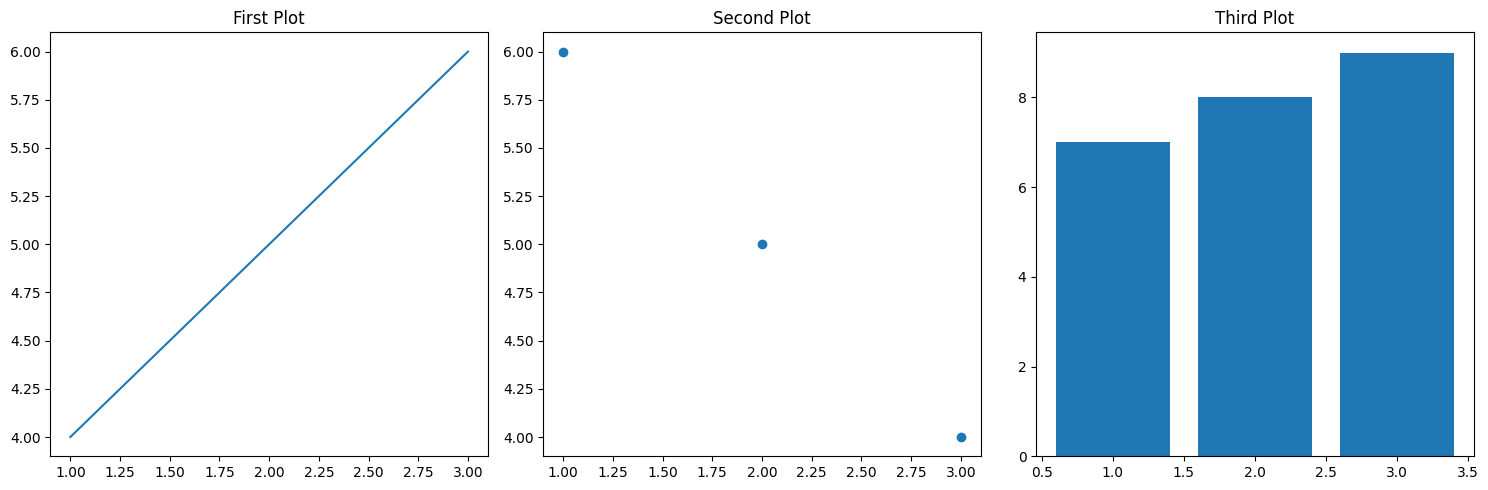

In [1]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# First subplot
ax[0].plot([1, 2, 3], [4, 5, 6])
ax[0].set_title("First Plot")

# Second subplot
ax[1].scatter([1, 2, 3], [6, 5, 4])
ax[1].set_title("Second Plot")

# Third subplot
ax[2].bar([1, 2, 3], [7, 8, 9])
ax[2].set_title("Third Plot")

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


c:\Users\Jakub.Cajzl\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jakub.Cajzl\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jakub.Cajzl\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Jakub.Cajzl\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcor

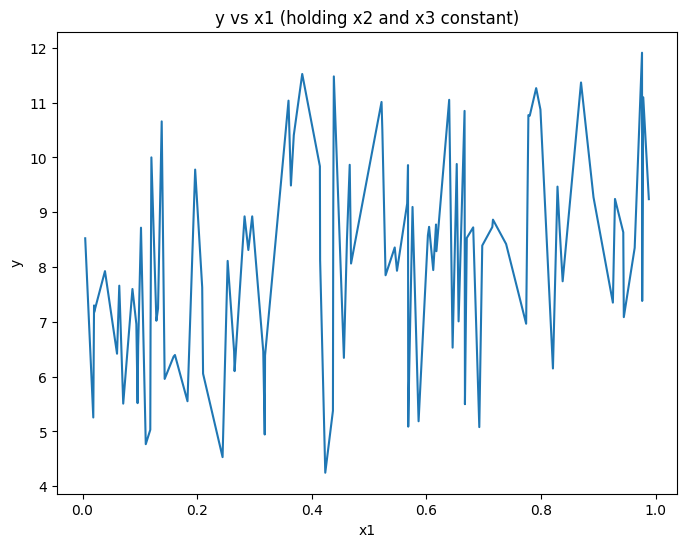

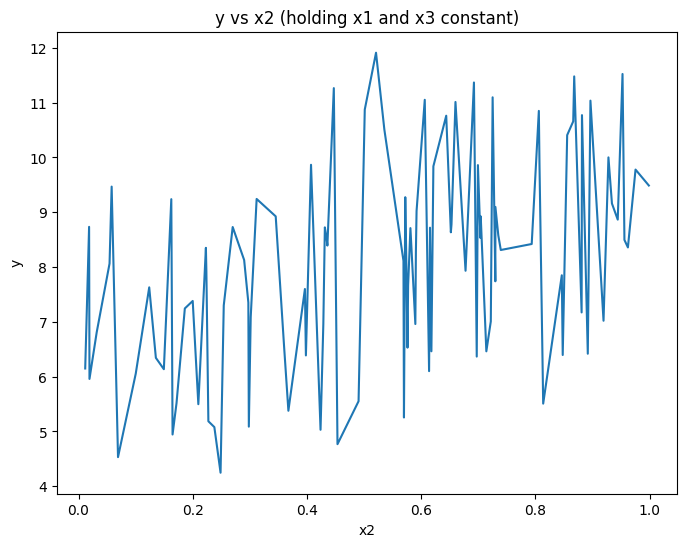

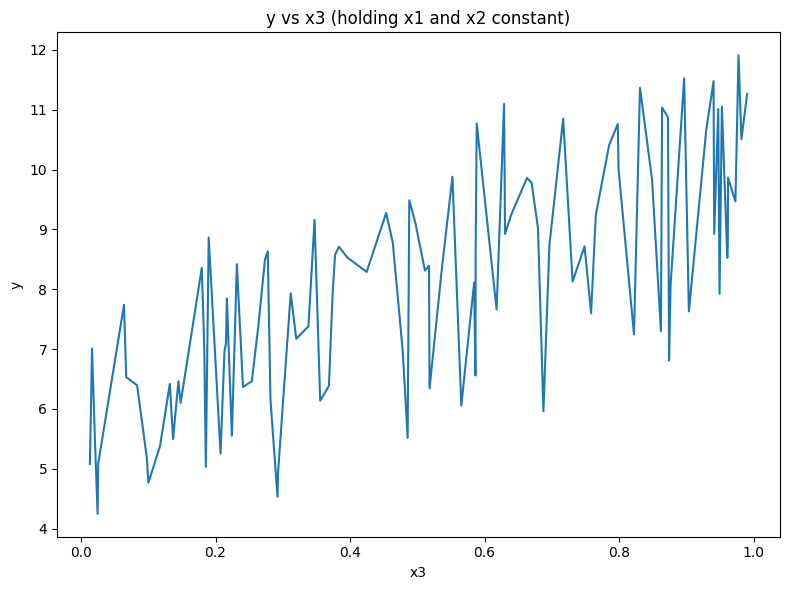

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generating synthetic data
np.random.seed(0)
n_samples = 100
x1 = np.random.rand(n_samples)
x2 = np.random.rand(n_samples)
x3 = np.random.rand(n_samples)
b = 2
w1 = 3
w2 = 4
w3 = 5

# Generate y using the model y = b + w1*x1 + w2*x2 + w3*x3
y = b + w1*x1 + w2*x2 + w3*x3 + np.random.normal(0, 0.1, n_samples)

# 1. Plot y vs x1 (holding x2, x3 constant)
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=x1, y=y, ax=ax)
ax.set_title('y vs x1 (holding x2 and x3 constant)')
ax.set_xlabel('x1')
ax.set_ylabel('y')

# 2. Plot y vs x2 (holding x1, x3 constant)
fig2, ax2 = plt.subplots(figsize=(8, 6))
sns.lineplot(x=x2, y=y, ax=ax2)
ax2.set_title('y vs x2 (holding x1 and x3 constant)')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')

# 3. Plot y vs x3 (holding x1, x2 constant)
fig3, ax3 = plt.subplots(figsize=(8, 6))
sns.lineplot(x=x3, y=y, ax=ax3)
ax3.set_title('y vs x3 (holding x1 and x2 constant)')
ax3.set_xlabel('x3')
ax3.set_ylabel('y')

plt.tight_layout()
plt.show()

## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.